In [1]:
#pip install imblearn

In [2]:
#import all the libraries i'll be using here
import pandas as pd
from scipy.io import arff #For import the arff file
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler,LabelEncoder
##from google.colab import drive
##drive.mount('/content/drive') 
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import RandomForestClassifier,IsolationForest
from imblearn.over_sampling import SMOTE,RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

#### **Dataset used: https://www.openml.org/search?type=data&sort=runs&status=active&id=4534**

In [3]:
data = arff.loadarff('Phishing_Websites.arff')
data= pd.DataFrame(data[0])
data.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,b'-1',b'1',b'1',b'1',b'-1',b'-1',b'-1',b'-1',b'-1',b'1',...,b'1',b'1',b'-1',b'-1',b'-1',b'-1',b'1',b'1',b'-1',b'-1'
1,b'1',b'1',b'1',b'1',b'1',b'-1',b'0',b'1',b'-1',b'1',...,b'1',b'1',b'-1',b'-1',b'0',b'-1',b'1',b'1',b'1',b'-1'
2,b'1',b'0',b'1',b'1',b'1',b'-1',b'-1',b'-1',b'-1',b'1',...,b'1',b'1',b'1',b'-1',b'1',b'-1',b'1',b'0',b'-1',b'-1'
3,b'1',b'0',b'1',b'1',b'1',b'-1',b'-1',b'-1',b'1',b'1',...,b'1',b'1',b'-1',b'-1',b'1',b'-1',b'1',b'-1',b'1',b'-1'
4,b'1',b'0',b'-1',b'1',b'1',b'-1',b'1',b'1',b'-1',b'1',...,b'-1',b'1',b'-1',b'-1',b'0',b'-1',b'1',b'1',b'1',b'1'


#### Quick Data Exploration

In [4]:
#Getting the dimensions of the dataset (rows=instances, columns=features)
data.shape

(11055, 31)

In [5]:
#Seeing what features i'll be working with
data.columns

Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

In [6]:
#Seeing the features' bounds (the max, min and the median)
data.describe()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055,...,11055,11055,11055,11055,11055,11055,11055,11055,11055,11055
unique,2,3,2,2,2,2,3,3,2,2,...,2,2,2,2,3,2,2,3,2,2
top,b'1',b'-1',b'1',b'1',b'1',b'-1',b'1',b'1',b'-1',b'1',...,b'1',b'1',b'1',b'1',b'1',b'-1',b'1',b'0',b'1',b'1'
freq,7262,8960,9611,9400,9626,9590,4070,6331,7389,9002,...,8918,10043,5866,7612,5831,8201,9516,6156,9505,6157


In [7]:
#Seeing what are the columns' datatypes (If non-numerical, then drop. I'll be working numbers)
data.dtypes

having_IP_Address              object
URL_Length                     object
Shortining_Service             object
having_At_Symbol               object
double_slash_redirecting       object
Prefix_Suffix                  object
having_Sub_Domain              object
SSLfinal_State                 object
Domain_registeration_length    object
Favicon                        object
port                           object
HTTPS_token                    object
Request_URL                    object
URL_of_Anchor                  object
Links_in_tags                  object
SFH                            object
Submitting_to_email            object
Abnormal_URL                   object
Redirect                       object
on_mouseover                   object
RightClick                     object
popUpWidnow                    object
Iframe                         object
age_of_domain                  object
DNSRecord                      object
web_traffic                    object
Page_Rank   

### Data Preprocessing/Cleaning

In [8]:
#Checking for any copies 
data.duplicated().sum() 

5206

### We will not be dropping any duplicates as our duplicates take up around 50% of our dataset. Duplicates can be helpful in training and generalizing our models. 

In [9]:
##Remaining columns: convert to appropriate datatypes (we'll be using that later)
le = preprocessing.LabelEncoder()
for i in data.columns:
    label=LabelEncoder()
    data[i]=label.fit_transform(data[i])
    data.tail()
data.dtypes 

having_IP_Address              int32
URL_Length                     int32
Shortining_Service             int32
having_At_Symbol               int32
double_slash_redirecting       int32
Prefix_Suffix                  int32
having_Sub_Domain              int32
SSLfinal_State                 int32
Domain_registeration_length    int32
Favicon                        int32
port                           int32
HTTPS_token                    int32
Request_URL                    int32
URL_of_Anchor                  int32
Links_in_tags                  int32
SFH                            int32
Submitting_to_email            int32
Abnormal_URL                   int32
Redirect                       int32
on_mouseover                   int32
RightClick                     int32
popUpWidnow                    int32
Iframe                         int32
age_of_domain                  int32
DNSRecord                      int32
web_traffic                    int32
Page_Rank                      int32
G

In [10]:
data.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,0,2,1,1,0,0,0,0,0,1,...,1,1,0,0,0,0,1,2,0,0
1,1,2,1,1,1,0,1,2,0,1,...,1,1,0,0,1,0,1,2,1,0
2,1,1,1,1,1,0,0,0,0,1,...,1,1,1,0,2,0,1,1,0,0
3,1,1,1,1,1,0,0,0,1,1,...,1,1,0,0,2,0,1,0,1,0
4,1,1,0,1,1,0,2,2,0,1,...,0,1,0,0,1,0,1,2,1,1


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            11055 non-null  int32
 1   URL_Length                   11055 non-null  int32
 2   Shortining_Service           11055 non-null  int32
 3   having_At_Symbol             11055 non-null  int32
 4   double_slash_redirecting     11055 non-null  int32
 5   Prefix_Suffix                11055 non-null  int32
 6   having_Sub_Domain            11055 non-null  int32
 7   SSLfinal_State               11055 non-null  int32
 8   Domain_registeration_length  11055 non-null  int32
 9   Favicon                      11055 non-null  int32
 10  port                         11055 non-null  int32
 11  HTTPS_token                  11055 non-null  int32
 12  Request_URL                  11055 non-null  int32
 13  URL_of_Anchor                11055 non-null  i

In [12]:
data.describe()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,0.656897,0.366802,0.869380,0.850294,0.870737,0.132519,1.063953,1.250927,0.331615,0.814292,...,0.806694,0.908458,0.530620,0.688557,1.287291,0.258164,0.860787,1.344007,0.859792,0.556943
std,0.474767,0.766095,0.336999,0.356799,0.335506,0.339070,0.817518,0.911892,0.470815,0.388888,...,0.394909,0.288392,0.499084,0.463104,0.827733,0.437644,0.346184,0.569944,0.347218,0.496769
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
50%,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,2.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000
max,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000


## Visualizing distribution and ouliers in the data

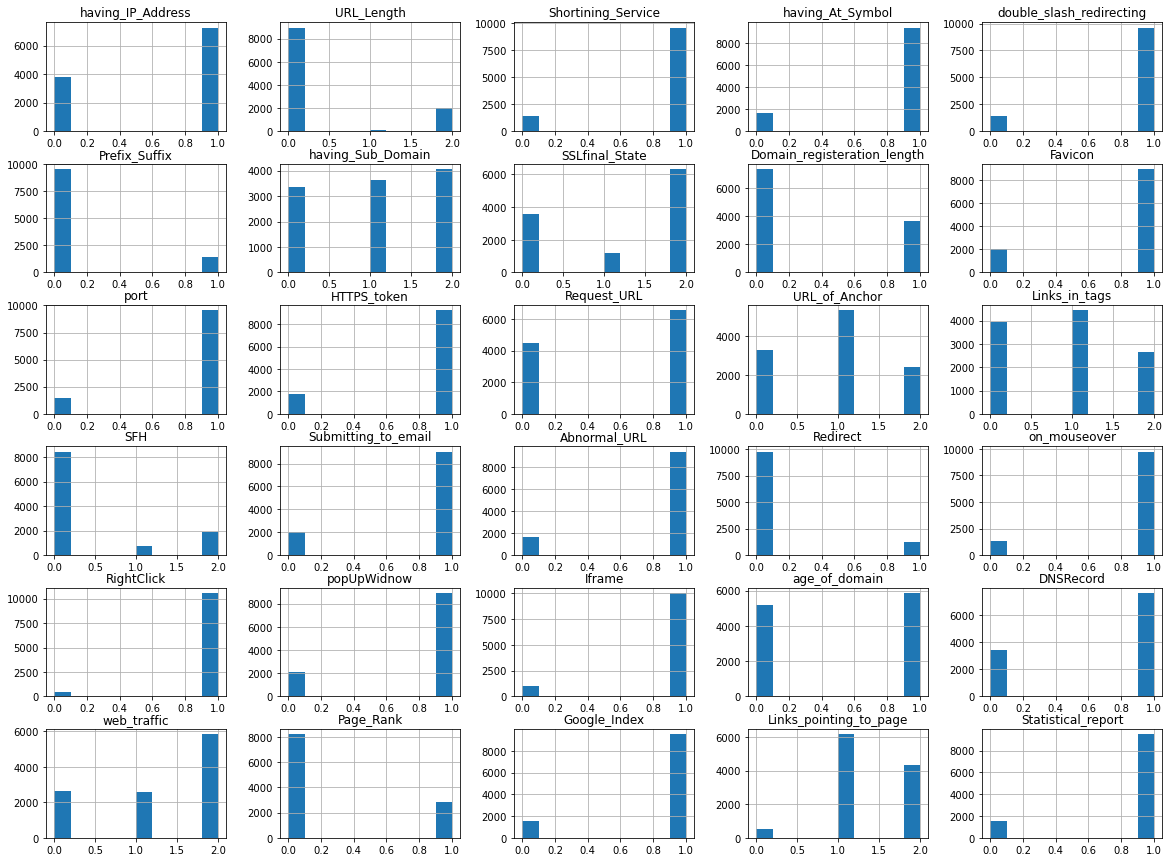

In [13]:
data.iloc[:,:-1].hist(figsize=(20, 15))
plt.show()

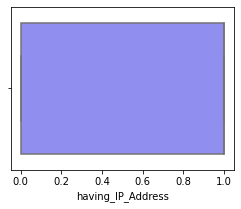

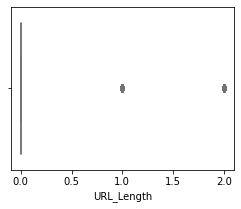

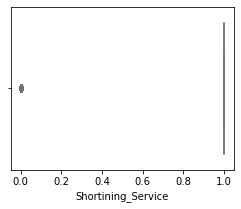

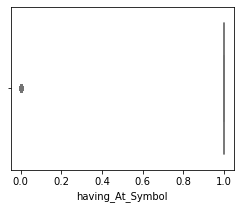

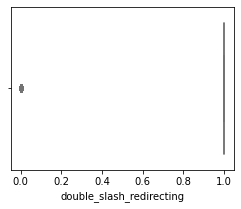

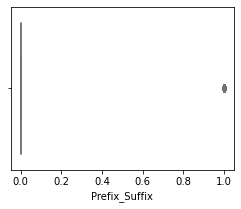

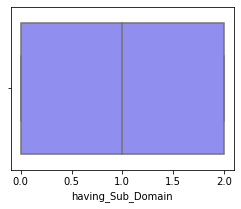

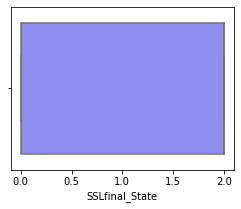

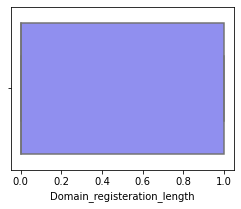

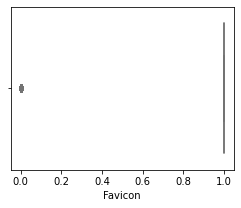

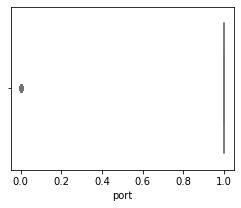

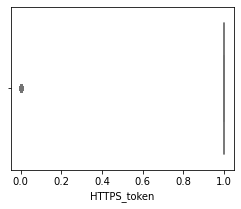

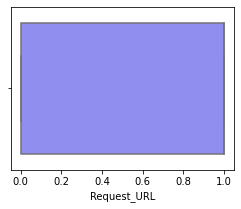

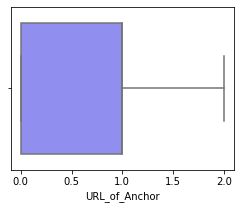

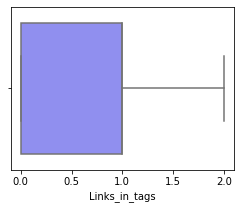

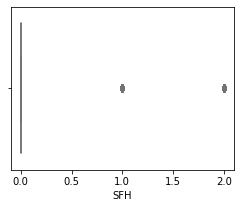

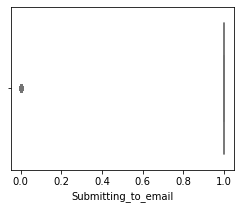

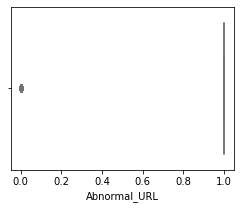

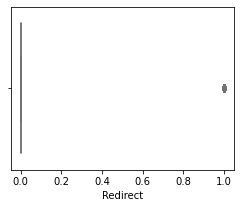

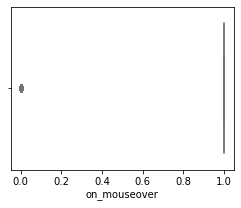

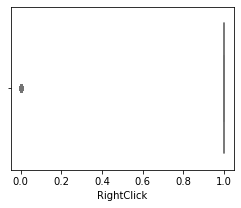

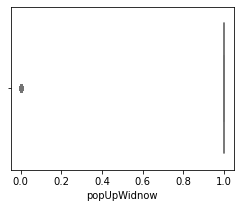

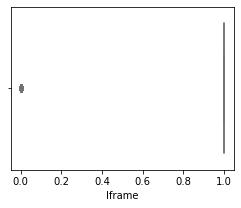

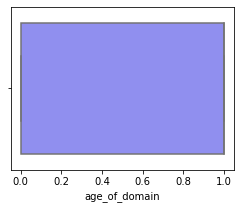

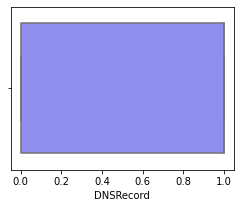

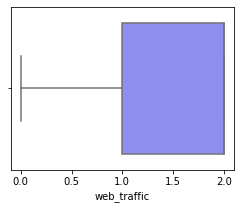

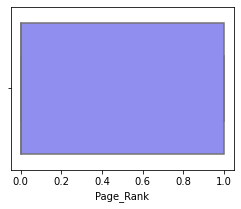

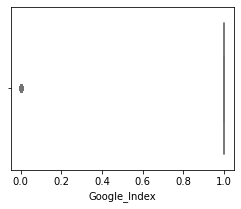

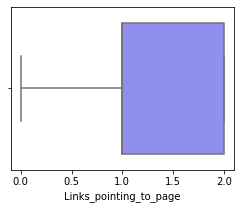

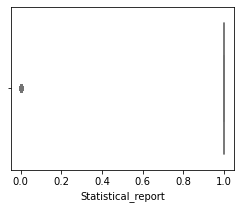

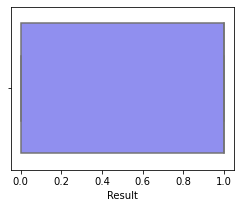

In [14]:
for i in data.columns:
    if i=="Results":
        break
    plt.figure(figsize=(4,3))
    ax = sns.boxplot(x=data[i],palette="cool")
    ax.set_xlabel(i,fontsize=10)
    plt.show()

In [15]:
## Splitting the dataset to x and y
X=data.iloc[:,:-1]
Y=data['Result']

## Comparing between Outlier detection methods

In [16]:
for x in [0.1,0.2,0.3,0.4]:
    Gaussian =  EllipticEnvelope(contamination=x)
    result=Gaussian.fit_predict(X)
    Outliers=X[result==-1]
    print(str(x) +": Number of detected outliers is " +str(len(Outliers)))

0.1: Number of detected outliers is 1106
0.2: Number of detected outliers is 2211
0.3: Number of detected outliers is 3317
0.4: Number of detected outliers is 4423


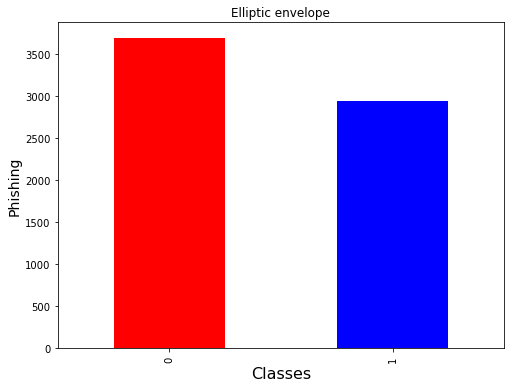

In [17]:
ax=Y[result!=-1].value_counts().plot(kind='bar',color=['red','blue','green','blueviolet','navy'],
                                          title='Elliptic envelope',figsize=(8, 6))

plt.xticks(range(2),['0', '1'])
ax.set_xlabel("Classes",fontsize=16)
ax.set_ylabel("Phishing",fontsize=14)
plt.show()

In [18]:
for x in range(3, 20, 2):
    KNN =  LocalOutlierFactor(n_neighbors=x)
    result2=KNN.fit_predict(X)
    Outliers=X[result2==-1]
    print(str(x)+": "+str(len(Outliers)))

3: 1905
5: 1805
7: 1534
9: 1018
11: 733
13: 620
15: 618
17: 501
19: 508


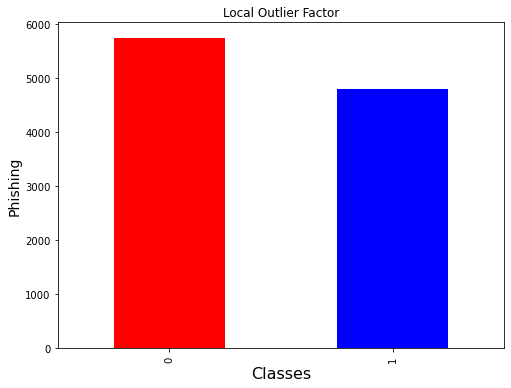

In [19]:
ax=Y[result2!=-1].value_counts().plot(kind='bar',color=['red','blue'],
                                          title='Local Outlier Factor',figsize=(8, 6))

plt.xticks(range(2),['0', '1'])
ax.set_xlabel("Classes",fontsize=16)
ax.set_ylabel("Phishing",fontsize=14)
plt.show()

In [20]:
for x in range(1, 20, 2):
    IF =  IsolationForest(n_estimators=x,random_state = 42)
    result3=IF.fit_predict(X)
    Outliers=X[result3==-1]
    print(str(x)+": Number of detected outliers is " + ' ' + str(len(Outliers)))

1: Number of detected outliers is  4317
3: Number of detected outliers is  4349
5: Number of detected outliers is  4054
7: Number of detected outliers is  3849
9: Number of detected outliers is  4119
11: Number of detected outliers is  4027
13: Number of detected outliers is  4160
15: Number of detected outliers is  4096
17: Number of detected outliers is  4078
19: Number of detected outliers is  4000


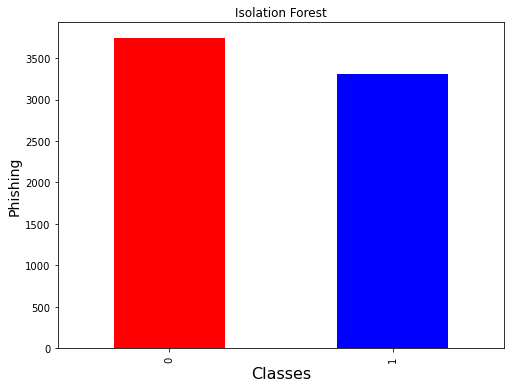

In [21]:
ax=Y[result3!=-1].value_counts().plot(kind='bar',color=['red','blue'],
                                          title='Isolation Forest',figsize=(8, 6))

plt.xticks(range(2),['0', '1'])
ax.set_xlabel("Classes",fontsize=16)
ax.set_ylabel("Phishing",fontsize=14)
plt.show()

### This concludes that we'll be using Local Outlier Factor (KNN) as it has the lowest number of outliers to be dropped. 

In [22]:
KNN =  LocalOutlierFactor(n_neighbors=19)
result2=KNN.fit_predict(X)
knn_Outliers=X[result2==-1]
print(str(x)+": "+str(len(knn_Outliers)))

19: 508


In [23]:
## Remove the outliers from x_dataset and y_dataset then split them again 
##############SOL##############
newX=X[result2!=-1]
newY=Y[result2!=-1]

In [24]:
newX.describe()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
count,10547.000000,10547.000000,10547.000000,10547.000000,10547.000000,10547.000000,10547.000000,10547.000000,10547.000000,10547.000000,...,10547.000000,10547.000000,10547.000000,10547.000000,10547.000000,10547.000000,10547.000000,10547.000000,10547.000000,10547.000000
mean,0.645207,0.377169,0.867640,0.849625,0.868873,0.133024,1.052053,1.224519,0.340571,0.808382,...,0.955912,0.800986,0.905945,0.517872,0.679340,1.267754,0.262255,0.860529,1.363136,0.859581
std,0.478473,0.775577,0.338898,0.357455,0.337556,0.339616,0.812291,0.916500,0.473924,0.393593,...,0.205301,0.399277,0.291919,0.499704,0.466752,0.831297,0.439881,0.346454,0.568066,0.347438
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
50%,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,1.000000,1.000000,1.000000
75%,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,2.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000
max,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000


The minimum and max ranges from [0:2] or [0:1] so the scalling of the data is not needed

# Daniel

### 0. A function that turns train-test split variables into numpy for the bias/variance comparisons later on

In [25]:
def turnto(x_train, x_test, y_train, y_test):
    x_train=x_train.to_numpy()
    x_test=x_test.to_numpy()
    y_train=y_train.to_numpy()
    y_test=y_test.to_numpy()
    return x_train,x_test, y_train, y_test

### 1. Indivdual Model Training and Testing Before Data Resampling

#### 1.1 Random Forest

In [26]:
# Train-Test Split

x_train, x_test, y_train, y_test = train_test_split(newX, newY, test_size=0.3,random_state=42)

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

#### Since the Dataset is unbalanced, and has not been resampled yet, f-score will be used as the metric to measure the model's performance

Text(0, 0.5, 'Testing F-Score')

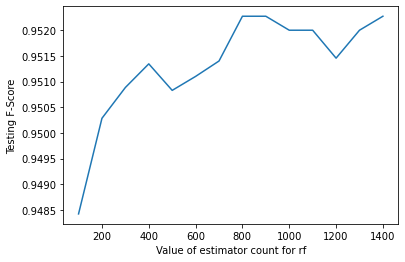

In [28]:
rf_range = range(100, 1500, 100)
scores = []
for est in rf_range:
    rnd_clf = RandomForestClassifier(n_estimators=est, max_leaf_nodes=16, n_jobs=-1, random_state=42)
    rnd_clf.fit(x_train, y_train)
    y_pred = rnd_clf.predict(x_test)
    scores.append(metrics.f1_score(y_test, y_pred))

plt.plot(rf_range, scores)
plt.xlabel('Value of estimator count for rf')
plt.ylabel('Testing F-Score')

#### It seems that the most optimal number of estimators is 800

Text(0, 0.5, 'Testing F-Score')

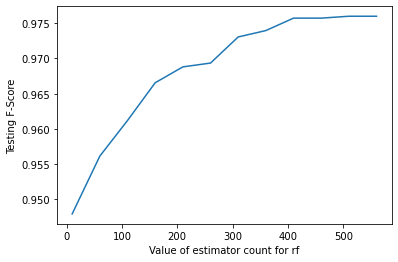

In [29]:
ln_range = range(10, 600, 50)
scores = []
for ln in ln_range:
    rnd_clf = RandomForestClassifier(n_estimators=800, max_leaf_nodes=ln, n_jobs=-1, random_state=42)
    rnd_clf.fit(x_train, y_train)
    y_pred = rnd_clf.predict(x_test)
    scores.append(metrics.f1_score(y_test, y_pred))

plt.plot(ln_range, scores)
plt.xlabel('Value of estimator count for rf')
plt.ylabel('Testing F-Score')

#### Model performance plateaus at 400 leaf nodes.

In [30]:
rf_opt_est = 800

rf_opt_ln = 400

#### 1.2 Model Training

In [31]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf_ns_nfs = RandomForestClassifier(n_estimators=rf_opt_est, max_leaf_nodes=rf_opt_ln, n_jobs=-1, random_state=42)
rnd_clf_ns_nfs.fit(x_train, y_train)

y_pred_rf_ns_nfs = rnd_clf.predict(x_test)

#### 1.3 Model Testing

#### Accuracy and Classification Report (F1-Score)

In [32]:
print("Random Forest Accuracy = ",metrics.accuracy_score(y_test, y_pred_rf_ns_nfs))
print("Random Forest F-Score = ",metrics.f1_score(y_test, y_pred_rf_ns_nfs))
print("Random Forest Classification Report = \n ",  metrics.classification_report(y_test,y_pred_rf_ns_nfs))

Random Forest Accuracy =  0.9737756714060032
Random Forest F-Score =  0.9759907434191495
Random Forest Classification Report = 
                precision    recall  f1-score   support

           0       0.98      0.97      0.97      1445
           1       0.97      0.98      0.98      1720

    accuracy                           0.97      3165
   macro avg       0.97      0.97      0.97      3165
weighted avg       0.97      0.97      0.97      3165



#### Accuracy and F1-Score both reached 97%

#### ROC Curve

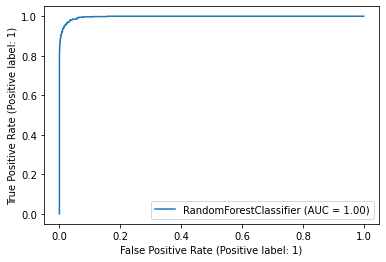

In [33]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(rnd_clf_ns_nfs, x_test, y_test)
plt.show()

#### The model is very capable of distinguishing between the two classes as indicated by the ROC  Curve (Confusion Matrix needs to be examined to see the False Negative Values)

#### Confusion Matrix

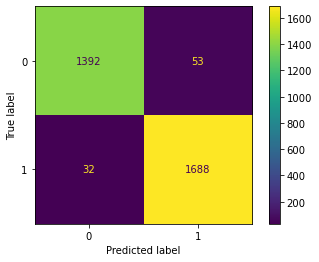

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(rnd_clf_ns_nfs, x_test, y_test)

#### False Negatives predicted count are lower than the False Positive ones, which indicate that the model is more likely to classify positive values as negative (safe websites are classified as phishing sites), rather than the opposite.

#### In the case of phishing websites, this is better than the opposite case as it is better to classify wrongly classify safe sites as phishing sites rather than having phishing sites being classified as safe. When it comes to security, it is usually better to be safe than sorry.

#### Learning Curve

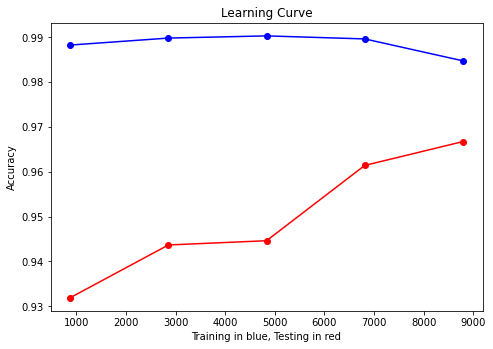

In [35]:
from sklearn.model_selection import learning_curve

train_sizes_model, train_scores_model, valid_scores_model, *_ =learning_curve(rnd_clf_ns_nfs, newX, newY,cv=6,
                    scoring='accuracy',n_jobs=-1)
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(x=train_sizes_model,y= train_scores_model.mean(axis=1), color='b')
ax.scatter(x=train_sizes_model,y=valid_scores_model.mean(axis=1), color='r')
ax.plot(train_sizes_model,train_scores_model.mean(axis=1), color='b')
ax.plot(train_sizes_model,valid_scores_model.mean(axis=1), color='r')
ax.set_xlabel('Training in blue, Testing in red')
ax.set_ylabel('Accuracy')
ax.set_title('Learning Curve')
plt.show()

#### Random Forest with no sampling, and no feature Selection Learning Curve

In [36]:
from mlxtend.evaluate import bias_variance_decomp
#turning pandas df and pandas series into numpy arrays
x_train_new,x_test_new,y_train_new,y_test_new = turnto(x_train,x_test,y_train,y_test)
#bias/variance
mse, bias, var = bias_variance_decomp\
(rnd_clf_ns_nfs, x_train_new, y_train_new, x_test_new, y_test_new, loss='mse', num_rounds=20, random_seed=42)

#values

print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

MSE: 0.032
Bias: 0.023
Variance: 0.009


#### The model converges at 97% accuracy, with lower variance, and a low bias (bias is expected to be higher than variance, but both overall are low)

##### Small Side note: mse and 0-1 loss loss functions achieve the same scores, so mse was standardized in the project

## Data Resampling Techniques

### 1. Random Oversampling

In [37]:
Random_Oversampler = RandomOverSampler(random_state=42)
ro_x,ro_y=Random_Oversampler.fit_resample(newX, newY)

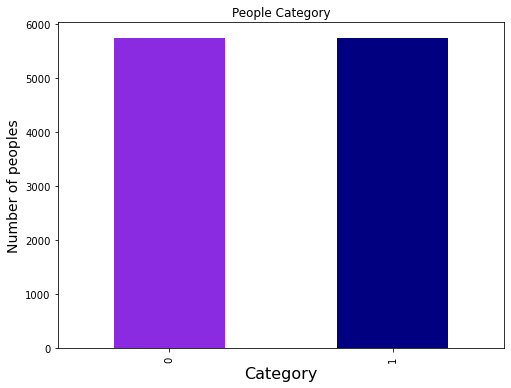

In [38]:
ax=pd.DataFrame(ro_y,columns=['Result'])['Result'].value_counts().plot(kind='bar',color=['blueviolet','navy'],
                                          title='People Category',figsize=(8, 6))

plt.xticks(range(2),['0','1'])
ax.set_xlabel("Category",fontsize=16)
ax.set_ylabel("Number of peoples",fontsize=14)
plt.show()

In [39]:
x_train, x_test, y_train, y_test = train_test_split(ro_x, ro_y,stratify=ro_y, test_size=0.3,random_state=42)

### Model Training

In [40]:
rnd_clf_ro = RandomForestClassifier(n_estimators=rf_opt_est, max_leaf_nodes=rf_opt_ln, n_jobs=-1, random_state=42)
rnd_clf_ro.fit(x_train, y_train)

y_pred_rf_ro_nfs = rnd_clf_ro.predict(x_test)

### Model Testing

In [41]:
print("Random Forest Accuracy = ",metrics.accuracy_score(y_test, y_pred_rf_ro_nfs))
print("Random Forest F-Score = ",metrics.f1_score(y_test, y_pred_rf_ro_nfs))
print("Random Forest Classification Report = \n ",  metrics.classification_report(y_test,y_pred_rf_ro_nfs))

Random Forest Accuracy =  0.9736231884057971
Random Forest F-Score =  0.973554199360651
Random Forest Classification Report = 
                precision    recall  f1-score   support

           0       0.97      0.98      0.97      1725
           1       0.98      0.97      0.97      1725

    accuracy                           0.97      3450
   macro avg       0.97      0.97      0.97      3450
weighted avg       0.97      0.97      0.97      3450



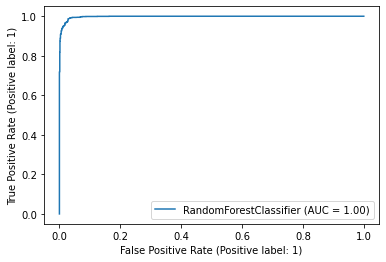

In [42]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(rnd_clf_ro, x_test, y_test)
plt.show()

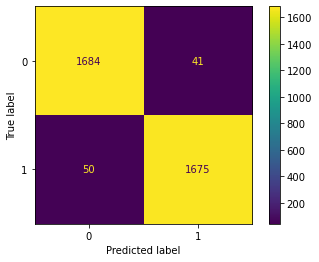

In [43]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(rnd_clf_ro, x_test, y_test)

### According to the confusion matrix, the model was able to classify more False Negatives than False Positives, which indicate that the model is not able to keep a "better safe than sorry" approach, which is heavily favoured over the alternative, especially in this domain (internet security)

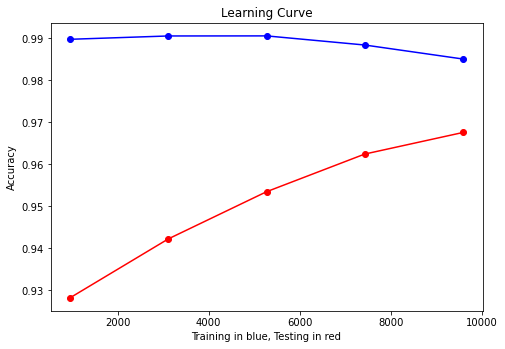

In [44]:
from sklearn.model_selection import learning_curve

train_sizes_model, train_scores_model, valid_scores_model, *_ =learning_curve(rnd_clf_ro, ro_x, ro_y,cv=6,
                    scoring='accuracy',n_jobs=-1)
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(x=train_sizes_model,y= train_scores_model.mean(axis=1), color='b')
ax.scatter(x=train_sizes_model,y=valid_scores_model.mean(axis=1), color='r')
ax.plot(train_sizes_model,train_scores_model.mean(axis=1), color='b')
ax.plot(train_sizes_model,valid_scores_model.mean(axis=1), color='r')
ax.set_xlabel('Training in blue, Testing in red')
ax.set_ylabel('Accuracy')
ax.set_title('Learning Curve')
plt.show()

#### Random Forest with random oversampling, and no feature selection learning curve

In [45]:
from mlxtend.evaluate import bias_variance_decomp
#turning pandas df and pandas series into numpy arrays
x_train_new,x_test_new,y_train_new,y_test_new = turnto(x_train,x_test,y_train,y_test)
#bias/variance
mse, bias, var = bias_variance_decomp\
(rnd_clf_ro, x_train_new, y_train_new, x_test_new, y_test_new, loss='mse', num_rounds=20, random_seed=42)

#values

print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

MSE: 0.029
Bias: 0.020
Variance: 0.009


#### Model converged at 97% with lower variance, and low bias

### 2. Undersampling

In [46]:
Random_UnderSampler = RandomUnderSampler(random_state=42)
ru_x,ru_y=Random_UnderSampler.fit_resample(newX, newY)

#### 1. Model Training

In [47]:
rnd_clf_ru = RandomForestClassifier(n_estimators=rf_opt_est, max_leaf_nodes=rf_opt_ln, n_jobs=-1, random_state=42)
rnd_clf_ru.fit(x_train, y_train)

y_pred_rf_ru_nfs = rnd_clf_ru.predict(x_test)

#### 2. Model Testing

In [48]:
print("Random Forest Accuracy = ",metrics.accuracy_score(y_test, y_pred_rf_ru_nfs))
print("Random Forest F-Score = ",metrics.f1_score(y_test, y_pred_rf_ru_nfs))
print("Random Forest Classification Report = \n ",  metrics.classification_report(y_test,y_pred_rf_ru_nfs))

Random Forest Accuracy =  0.9736231884057971
Random Forest F-Score =  0.973554199360651
Random Forest Classification Report = 
                precision    recall  f1-score   support

           0       0.97      0.98      0.97      1725
           1       0.98      0.97      0.97      1725

    accuracy                           0.97      3450
   macro avg       0.97      0.97      0.97      3450
weighted avg       0.97      0.97      0.97      3450



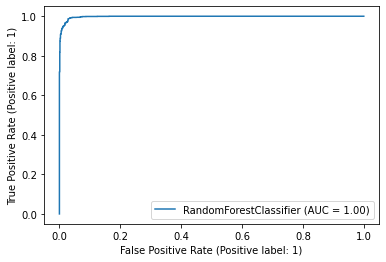

In [49]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(rnd_clf_ru, x_test, y_test)
plt.show()

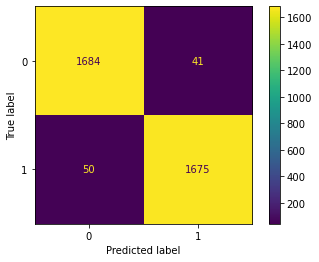

In [50]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(rnd_clf_ru, x_test, y_test)

### Still, less False Positives than False Negatives

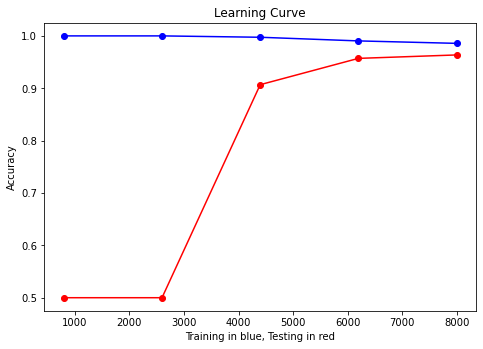

In [51]:
from sklearn.model_selection import learning_curve

train_sizes_model, train_scores_model, valid_scores_model, *_ =learning_curve(rnd_clf_ru, ru_x, ru_y,cv=6,
                    scoring='accuracy',n_jobs=-1)
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(x=train_sizes_model,y= train_scores_model.mean(axis=1), color='b')
ax.scatter(x=train_sizes_model,y=valid_scores_model.mean(axis=1), color='r')
ax.plot(train_sizes_model,train_scores_model.mean(axis=1), color='b')
ax.plot(train_sizes_model,valid_scores_model.mean(axis=1), color='r')
ax.set_xlabel('Training in blue, Testing in red')
ax.set_ylabel('Accuracy')
ax.set_title('Learning Curve')
plt.show()

#### Random Forest with random undersampling, and no feature Selection Learning Curve

In [52]:
from mlxtend.evaluate import bias_variance_decomp
#turning pandas df and pandas series into numpy arrays
x_train_new,x_test_new,y_train_new,y_test_new = turnto(x_train,x_test,y_train,y_test)
#bias/variance
mse, bias, var = bias_variance_decomp\
(rnd_clf_ru, x_train_new, y_train_new, x_test_new, y_test_new, loss='mse', num_rounds=20, random_seed=42)

#values

print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

MSE: 0.029
Bias: 0.020
Variance: 0.009


#### Model converged at 97.3% with low variance, slightly higher bias (both values are considered low, judging by the learning curve)

### 3. Smote

The data is imbalanced so we will use SMOTE because other data resampling techniques may result in data loss because they decrease the majority class

In [53]:
oversample = SMOTE(random_state=42)
overX,overY=oversample.fit_resample(newX, newY)

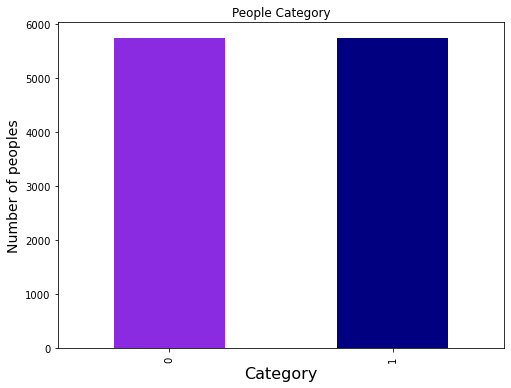

In [54]:
# First over sampling to make all classes equal
# As observed after undersampling , the two classes are balanced 
ax=pd.DataFrame(overY,columns=['Result'])['Result'].value_counts().plot(kind='bar',color=['blueviolet','navy'],
                                          title='People Category',figsize=(8, 6))

plt.xticks(range(2),['0','1'])
ax.set_xlabel("Category",fontsize=16)
ax.set_ylabel("Number of peoples",fontsize=14)
plt.show()

In [55]:
x_train, x_test, y_train, y_test = train_test_split(overX, overY,stratify=overY, test_size=0.3,random_state=42)

### 1. Individual Model Training and Testing

#### 1.1 Random Forest

In [56]:
rnd_clf_s_nfs = RandomForestClassifier(n_estimators=rf_opt_est, max_leaf_nodes=rf_opt_ln, n_jobs=-1, random_state=42)
rnd_clf_s_nfs.fit(x_train, y_train)

y_pred_rf_s_nfs = rnd_clf_s_nfs.predict(x_test)

#### Model Testing

In [57]:
print("Random Forest Accuracy = ",metrics.accuracy_score(y_test, y_pred_rf_s_nfs))
print("Random Forest F-Score = ",metrics.f1_score(y_test, y_pred_rf_s_nfs))
print("Random Forest Classification Report = \n ",  metrics.classification_report(y_test,y_pred_rf_s_nfs))

Random Forest Accuracy =  0.9730434782608696
Random Forest F-Score =  0.9730043541364297
Random Forest Classification Report = 
                precision    recall  f1-score   support

           0       0.97      0.97      0.97      1725
           1       0.97      0.97      0.97      1725

    accuracy                           0.97      3450
   macro avg       0.97      0.97      0.97      3450
weighted avg       0.97      0.97      0.97      3450



#### accuracy and f1-score are the exact same after smote...

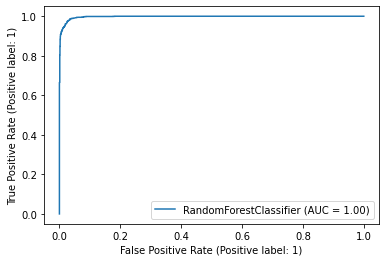

In [58]:
RocCurveDisplay.from_estimator(rnd_clf_s_nfs, x_test, y_test)
plt.show()

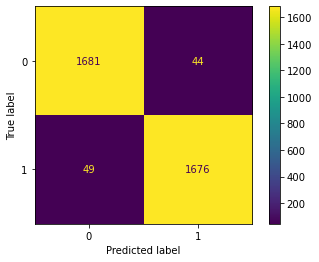

In [59]:
ConfusionMatrixDisplay.from_estimator(rnd_clf_s_nfs, x_test, y_test)

#### RF Models' False Positives are consistently lower than model's False Negatives

#### Although SMOTE and the other sampling techniques have the same accuracy, the SMOTE model has a closer number of false positives to false negatives in the confusion matrix. This indicates that, the SMOTE model is unbiased towards any class.

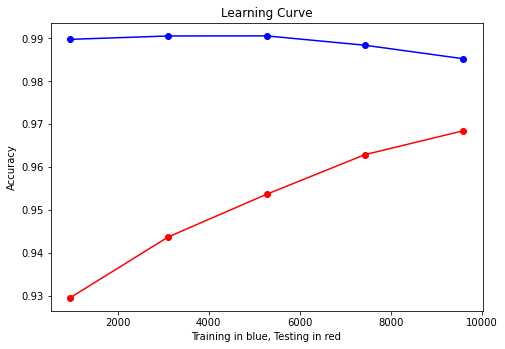

In [60]:
train_sizes_model, train_scores_model, valid_scores_model, *_ =learning_curve(rnd_clf_s_nfs, overX, overY,cv=6,
                    scoring='accuracy',n_jobs=-1)
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(x=train_sizes_model,y= train_scores_model.mean(axis=1), color='b')
ax.scatter(x=train_sizes_model,y=valid_scores_model.mean(axis=1), color='r')
ax.plot(train_sizes_model,train_scores_model.mean(axis=1), color='b')
ax.plot(train_sizes_model,valid_scores_model.mean(axis=1), color='r')
ax.set_xlabel('Training in blue, Testing in red')
ax.set_ylabel('Accuracy')
ax.set_title('Learning Curve')
plt.show()

#### Random Forest with SMOTE sampling, and no feature selection learning curve

In [61]:
from mlxtend.evaluate import bias_variance_decomp
#turning pandas df and pandas series into numpy arrays
x_train_new,x_test_new,y_train_new,y_test_new = turnto(x_train,x_test,y_train,y_test)
#bias/variance
mse, bias, var = bias_variance_decomp\
(rnd_clf_s_nfs, x_train_new, y_train_new, x_test_new, y_test_new, loss='mse', num_rounds=20, random_seed=42)

#values

print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

MSE: 0.030
Bias: 0.021
Variance: 0.009


#### model converged at 97.3% with slightly lower variance, and slightly higher bias (still, both values are low judging by the learning curve)

### All three models with resampling are still able to converge at the same accuracy regardless of technique.

### Therefore in order to have a fair comparison with the other models my colleagues are working on, SMOTE will be used.

### 2. Emsemble Model Training and Testing

#### 2.1 Bagging (Decision Trees)

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

#### Ensemble Training (Bagging)

### Once again, the best number of estimators will be tested

Text(0, 0.5, 'Testing Accuracy')

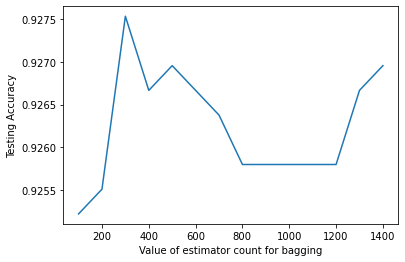

In [63]:
bag_range = range(100, 1500, 100)
scores = []
for est in bag_range:
    DT_clf = DecisionTreeClassifier(random_state=42)
    bag_clf = BaggingClassifier(
    base_estimator= DT_clf, n_estimators=est,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
    bag_clf.fit(x_train, y_train)
    y_pred = bag_clf.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(bag_range, scores)
plt.xlabel('Value of estimator count for bagging')
plt.ylabel('Testing Accuracy')

#### The best number of estimators is 300

Text(0, 0.5, 'Testing Accuracy')

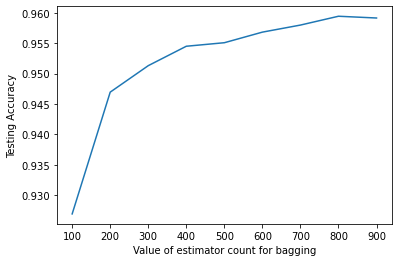

In [64]:
samples_range = range(100, 1000, 100)
scores = []
for sample in samples_range:
    DT_clf = DecisionTreeClassifier(random_state=42)
    bag_clf = BaggingClassifier(
    base_estimator= DT_clf, n_estimators=500,
    max_samples=sample, bootstrap=True, n_jobs=-1, random_state=42)
    bag_clf.fit(x_train, y_train)
    y_pred = bag_clf.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(samples_range, scores)
plt.xlabel('Value of estimator count for bagging')
plt.ylabel('Testing Accuracy')

#### Model performance plateaus at 800 samples

In [65]:
bag_opt_est = 300

bag_opt_samples = 800

#### Time to optimize the DT parameters itself

Text(0, 0.5, 'Testing Accuracy')

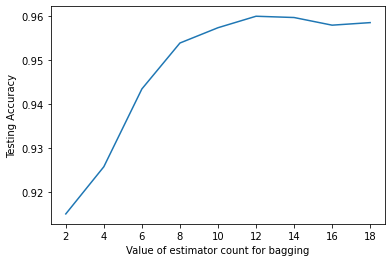

In [66]:
bag_range = range(2, 20, 2)
scores = []
for est in bag_range:
    DT_clf = DecisionTreeClassifier(max_depth = est,random_state=42)
    bag_clf = BaggingClassifier(
    base_estimator= DT_clf, n_estimators=bag_opt_est,
    max_samples=bag_opt_samples, bootstrap=True, n_jobs=-1, random_state=42)
    bag_clf.fit(x_train, y_train)
    y_pred = bag_clf.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(bag_range, scores)
plt.xlabel('Value of estimator count for bagging')
plt.ylabel('Testing Accuracy')

#### Best Max Depth is 12

In [67]:
DT_clf = DecisionTreeClassifier(max_depth = 12,random_state=42)

bag_clf = BaggingClassifier(
    base_estimator= DT_clf, n_estimators=bag_opt_est,
    max_samples=bag_opt_samples, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(x_train, y_train)
y_pred_bag_s_nfs = bag_clf.predict(x_test)

#### Ensemble Testing (Bagging)

In [68]:
print("Bagging Ensemble Method Accuracy = ",metrics.accuracy_score(y_test, y_pred_bag_s_nfs))
print("Bagging Ensemble Method F-Score = ",metrics.f1_score(y_test, y_pred_bag_s_nfs))
print("Bagging Classification Report = \n ",  metrics.classification_report(y_test,y_pred_bag_s_nfs))

Bagging Ensemble Method Accuracy =  0.96
Bagging Ensemble Method F-Score =  0.9600463231036481
Bagging Classification Report = 
                precision    recall  f1-score   support

           0       0.96      0.96      0.96      1725
           1       0.96      0.96      0.96      1725

    accuracy                           0.96      3450
   macro avg       0.96      0.96      0.96      3450
weighted avg       0.96      0.96      0.96      3450



#### Bagging achieved a lower accuracy score than RF, which was expected as Random Forest splits on a random subset of features, which allows the model to work with a smaller number of features. This results in less variance when training, and slightly better performance overall.

#### The difference between the two models is very small, however so it will not be taken too much into consideration

Source: https://towardsdatascience.com/why-random-forest-is-my-favorite-machine-learning-model-b97651fa3706#:~:text=Random%20forest%20improves%20on%20bagging,the%20features%20of%20the%20model.

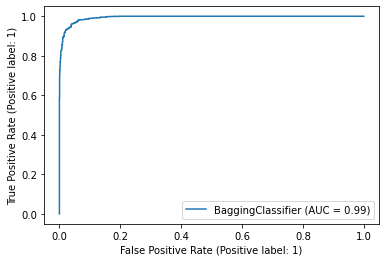

In [69]:
RocCurveDisplay.from_estimator(bag_clf, x_test, y_test)
plt.show()

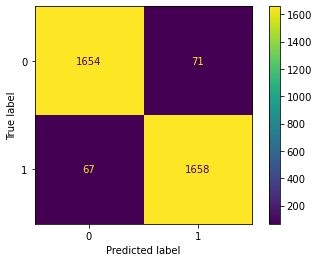

In [70]:
ConfusionMatrixDisplay.from_estimator(bag_clf, x_test, y_test)

#### in bagging, the model is also more biased towards false positives than false negatives. 

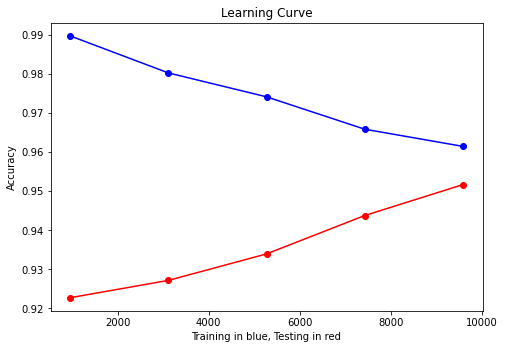

In [71]:
train_sizes_model, train_scores_model, valid_scores_model, *_ =learning_curve(bag_clf, overX, overY,cv=6,
                    scoring='accuracy',n_jobs=-1)
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(x=train_sizes_model,y= train_scores_model.mean(axis=1), color='b')
ax.scatter(x=train_sizes_model,y=valid_scores_model.mean(axis=1), color='r')
ax.plot(train_sizes_model,train_scores_model.mean(axis=1), color='b')
ax.plot(train_sizes_model,valid_scores_model.mean(axis=1), color='r')
ax.set_xlabel('Training in blue, Testing in red')
ax.set_ylabel('Accuracy')
ax.set_title('Learning Curve')
plt.show()

#### Bagging with DT Base Classifier smote sampling, and no feature selection learning curve

In [72]:
from mlxtend.evaluate import bias_variance_decomp
#turning pandas df and pandas series into numpy arrays
x_train_new,x_test_new,y_train_new,y_test_new = turnto(x_train,x_test,y_train,y_test)
#bias/variance
mse, bias, var = bias_variance_decomp\
(bag_clf, x_train_new, y_train_new, x_test_new, y_test_new, loss='mse', num_rounds=20, random_seed=42)

#values

print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

MSE: 0.043
Bias: 0.035
Variance: 0.008


### Model Converges at over 96% accuracy with no overfitting

#### 2.2 Bagging (Random Forest Classifier)

#### Values of number of estimators, and max samples will be optimized, but this time on a RF classifier.

Text(0, 0.5, 'Testing Accuracy')

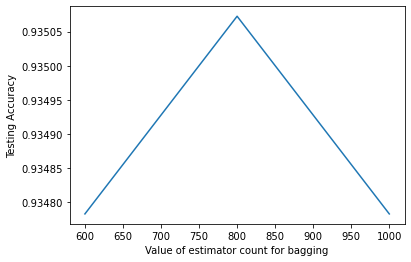

In [73]:
bag_rf_max_est_range = range(600, 1200, 200)
max_bag_rf_est_scores = []
for est in bag_rf_max_est_range:
    RF_clf = RandomForestClassifier(random_state=42)
    bag_clf = BaggingClassifier(
    base_estimator= RF_clf, n_estimators=est,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
    bag_clf.fit(x_train, y_train)
    y_pred = bag_clf.predict(x_test)
    max_bag_rf_est_scores.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(bag_rf_max_est_range, max_bag_rf_est_scores)
plt.xlabel('Value of estimator count for bagging')
plt.ylabel('Testing Accuracy')

#### It seems that the curve of the best estimator peaks at  800

Text(0, 0.5, 'Testing Accuracy')

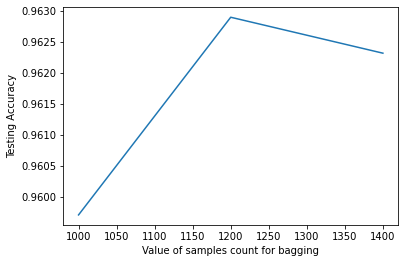

In [74]:
bag_rf_max_samples_range = range(1000, 1600, 200)
max_bag_rf_samples_scores = []
for sample in bag_rf_max_samples_range:
    RF_clf = RandomForestClassifier(random_state=42)
    bag_clf = BaggingClassifier(
    base_estimator= RF_clf, n_estimators=800,
    max_samples=sample, bootstrap=True, n_jobs=-1, random_state=42)
    bag_clf.fit(x_train, y_train)
    y_pred = bag_clf.predict(x_test)
    max_bag_rf_samples_scores.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(bag_rf_max_samples_range, max_bag_rf_samples_scores)
plt.xlabel('Value of samples count for bagging')
plt.ylabel('Testing Accuracy')

#### The curve linearly decreases after 1200 samples

In [75]:
bag_opt_est_rf = 800

bag_opt_sam_rf = 1200

### Ensemble (Random Forest) Model Training

#### this crashed so many times, it will not be counted in the comparison

RF_clf = RandomForestClassifier(n_estimators = 800,max_leaf_nodes = 400,random_state=42)

bag_clf_rf_nfs = BaggingClassifier(
    base_estimator= RF_clf, n_estimators=bag_opt_est_rf,
    max_samples=bag_opt_sam_rf, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf_rf_nfs.fit(x_train, y_train)
y_pred_bag_s_rf_nfs = bag_clf_rf_nfs.predict(x_test)

### Ensemble (Random Forest) Model Testing

print("Bagging Ensemble Method RF Accuracy = ",metrics.accuracy_score(y_test, y_pred_bag_s_rf_nfs))
print("Bagging Ensemble Method RF F-Score = ",metrics.f1_score(y_test, y_pred_bag_s_rf_nfs))
print("Bagging RF Classification Report = \n ",  metrics.classification_report(y_test,y_pred_bag_s_rf_nfs))

RocCurveDisplay.from_estimator(bag_clf_rf_nfs, x_test, y_test)
plt.show()

ConfusionMatrixDisplay.from_estimator(bag_clf_rf_nfs, x_test, y_test)

#### In this case, number of False Positives is lower than the number of False Negatives, which again, indicates that some phishing websites are classified as safe, and that is more dangerous than the opposite

train_sizes_model, train_scores_model, valid_scores_model, *_ =learning_curve(bag_clf_rf_nfs, overX, overY,cv=6,
                    scoring='accuracy',n_jobs=-1)
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(x=train_sizes_model,y= train_scores_model.mean(axis=1), color='b')
ax.scatter(x=train_sizes_model,y=valid_scores_model.mean(axis=1), color='r')
ax.plot(train_sizes_model,train_scores_model.mean(axis=1), color='b')
ax.plot(train_sizes_model,valid_scores_model.mean(axis=1), color='r')
ax.set_xlabel('Training in blue, Testing in red')
ax.set_ylabel('Accuracy')
ax.set_title('Learning Curve')
plt.show()

#### Ensemble with Random Forest Classifier, SMOTE sampling, and no feature selection Learning Curve

from mlxtend.evaluate import bias_variance_decomp
#turning pandas df and pandas series into numpy arrays
x_train_new,x_test_new,y_train_new,y_test_new = turnto(x_train,x_test,y_train,y_test)
#bias/variance
mse, bias, var = bias_variance_decomp\
(bag_clf_rf_nfs, x_train_new, y_train_new, x_test_new, y_test_new, loss='mse', num_rounds=20, random_seed=42)

#values

print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

#### Model Converged at 96% accuracy. In this case, bias was bit higher than variance, but both values were still very low

### There was not a very big difference between the performances of the random forest classifier , and the bagging classifier (avg 97% vs avg 96%). Although, the bagging classifier dipped slightly in accuracy and F1-Score. The DT classifier in the bagging model was lower than the RF classifier in the bagging model, which indicates that RF is more optimized for this dataset.

### However, More testing is required in order to confirm that this is the best that ensemble models can do. In an attempt to squeeze more performance out of the classifiers, we will perform Correlation Feature Selection, as features may have high correlation with each other, thus affecting the performance of the models.

### Feature Selection

In [76]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [77]:
correlated_features = correlation(x_train, 0.7)
print(correlated_features)

{'HTTPS_token', 'port', 'popUpWidnow', 'Submitting_to_email', 'on_mouseover', 'Abnormal_URL', 'double_slash_redirecting'}


In [78]:
overX.drop(labels = correlated_features, axis = 1, inplace = True)

### Now, we will do make another train-test split and train new models with the new features

In [79]:
x_train, x_test, y_train, y_test = train_test_split(overX, overY,stratify=overY, test_size=0.3,random_state=42)

### 3. Indivdual Model Training and Testing

### Random Forest

#### 3.1 Model Training

In [80]:
rnd_clf_fs = RandomForestClassifier(n_estimators=rf_opt_est, max_leaf_nodes=rf_opt_ln, n_jobs=-1, random_state=42)
rnd_clf_fs.fit(x_train, y_train)

y_pred_rf_s_fs = rnd_clf_fs.predict(x_test)

#### 3.2 Model Testing

In [81]:
print("Random Forest Accuracy = ",metrics.accuracy_score(y_test, y_pred_rf_s_fs))
print("Random Forest F-Score = ",metrics.f1_score(y_test, y_pred_rf_s_fs))
print("Random Forest Classification Report = \n ",  metrics.classification_report(y_test,y_pred_rf_s_fs))

Random Forest Accuracy =  0.9718840579710145
Random Forest F-Score =  0.971908485375036
Random Forest Classification Report = 
                precision    recall  f1-score   support

           0       0.97      0.97      0.97      1725
           1       0.97      0.97      0.97      1725

    accuracy                           0.97      3450
   macro avg       0.97      0.97      0.97      3450
weighted avg       0.97      0.97      0.97      3450



#### Very tiny dip after FS (97.3% -> 97.1%)

#### Roc Curve

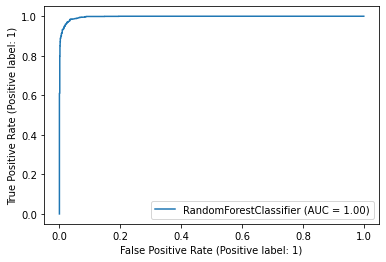

In [82]:
RocCurveDisplay.from_estimator(rnd_clf_fs, x_test, y_test)
plt.show()

#### Confusion Matrix

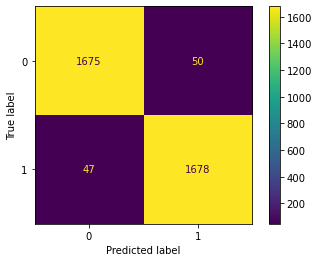

In [83]:
ConfusionMatrixDisplay.from_estimator(rnd_clf_fs, x_test, y_test)

#### Confusion Matrix results are same as above

#### Learning Curve

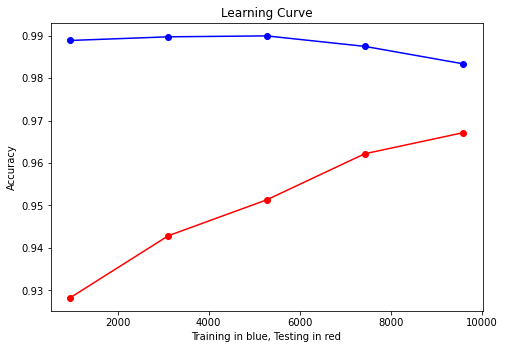

In [84]:
train_sizes_model, train_scores_model, valid_scores_model, *_ =learning_curve(rnd_clf_fs, overX, overY,cv=6,
                    scoring='accuracy',n_jobs=-1)
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(x=train_sizes_model,y= train_scores_model.mean(axis=1), color='b')
ax.scatter(x=train_sizes_model,y=valid_scores_model.mean(axis=1), color='r')
ax.plot(train_sizes_model,train_scores_model.mean(axis=1), color='b')
ax.plot(train_sizes_model,valid_scores_model.mean(axis=1), color='r')
ax.set_xlabel('Training in blue, Testing in red')
ax.set_ylabel('Accuracy')
ax.set_title('Learning Curve')
plt.show()

#### Random Forest with SMOTE sampling, and feature selection learning curve

In [85]:
from mlxtend.evaluate import bias_variance_decomp
#turning pandas df and pandas series into numpy arrays
x_train_new,x_test_new,y_train_new,y_test_new = turnto(x_train,x_test,y_train,y_test)
#bias/variance
mse, bias, var = bias_variance_decomp\
(rnd_clf_fs, x_train_new, y_train_new, x_test_new, y_test_new, loss='mse', num_rounds=20, random_seed=42)

#values

print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

MSE: 0.032
Bias: 0.022
Variance: 0.009


#### Very similar to the RF no Smote model. No overfitting, and a low bias, and a lower variance.

### 4. Ensemble Model Training and Testing

### Bagging (Decision Trees)

#### 4.1 Model Training

In [86]:
DT_clf_fs = DecisionTreeClassifier(max_depth = 12,random_state=42)

bag_clf_fs = BaggingClassifier(
    base_estimator= DT_clf_fs, n_estimators=bag_opt_est,
    max_samples=bag_opt_samples, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf_fs.fit(x_train, y_train)
y_pred_bag_s_fs = bag_clf_fs.predict(x_test)

#### 4.2 Model Testing

In [87]:
print("Bagging Ensemble Method Accuracy = ",metrics.accuracy_score(y_test, y_pred_bag_s_fs))
print("Bagging Ensemble Method F-Score = ",metrics.f1_score(y_test, y_pred_bag_s_fs))
print("Bagging Classification Report = \n ",  metrics.classification_report(y_test,y_pred_bag_s_fs))

Bagging Ensemble Method Accuracy =  0.9597101449275363
Bagging Ensemble Method F-Score =  0.9598149754264238
Bagging Classification Report = 
                precision    recall  f1-score   support

           0       0.96      0.96      0.96      1725
           1       0.96      0.96      0.96      1725

    accuracy                           0.96      3450
   macro avg       0.96      0.96      0.96      3450
weighted avg       0.96      0.96      0.96      3450



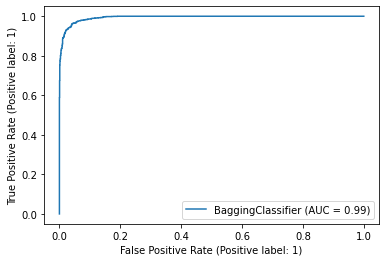

In [88]:
RocCurveDisplay.from_estimator(bag_clf_fs, x_test, y_test)
plt.show()

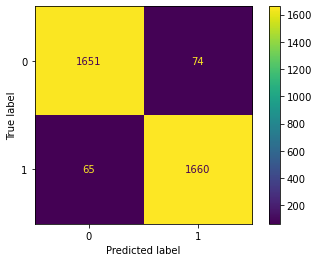

In [89]:
ConfusionMatrixDisplay.from_estimator(bag_clf_fs, x_test, y_test)

#### Same Confusion Matrix results as before

### Learning Curve

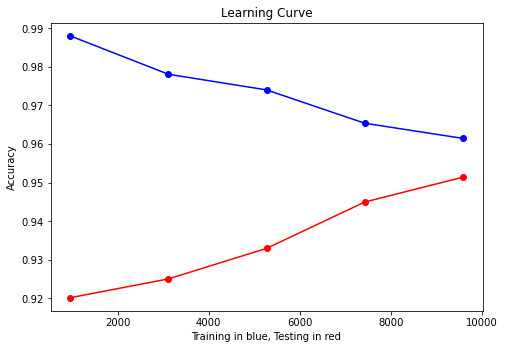

In [90]:
train_sizes_model, train_scores_model, valid_scores_model, *_ =learning_curve(bag_clf_fs, overX, overY,cv=6,
                    scoring='accuracy',n_jobs=-1)
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(x=train_sizes_model,y= train_scores_model.mean(axis=1), color='b')
ax.scatter(x=train_sizes_model,y=valid_scores_model.mean(axis=1), color='r')
ax.plot(train_sizes_model,train_scores_model.mean(axis=1), color='b')
ax.plot(train_sizes_model,valid_scores_model.mean(axis=1), color='r')
ax.set_xlabel('Training in blue, Testing in red')
ax.set_ylabel('Accuracy')
ax.set_title('Learning Curve')
plt.show()

#### Bagging Model with DT Classifier, with SMOTE, and Feature Selection learning curve

In [91]:
from mlxtend.evaluate import bias_variance_decomp
#turning pandas df and pandas series into numpy arrays
x_train_new,x_test_new,y_train_new,y_test_new = turnto(x_train,x_test,y_train,y_test)
#bias/variance
mse, bias, var = bias_variance_decomp\
(bag_clf_fs, x_train_new, y_train_new, x_test_new, y_test_new, loss='mse', num_rounds=20, random_seed=42)

#values

print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

MSE: 0.043
Bias: 0.035
Variance: 0.008


#### Converges at over 95%, no overfitting. Variance is still lower than bias, and bias is still at very low values

#### Same as the previous model without FS. However, Bagging with DT is consistently being outperformed by RF.

### Bagging (Random Forest)

#### 4.3 Model Training

#### This model keeps running out of memory when I run it with RF's optimal parameters

RF_clf_fs = RandomForestClassifier(random_state=42)

bag_rf_clf_fs = BaggingClassifier(
    base_estimator= RF_clf_fs, n_estimators=bag_opt_est_rf,
    max_samples=bag_opt_sam_rf, bootstrap=True, n_jobs=-1, random_state=42)
bag_rf_clf_fs.fit(x_train, y_train)
y_pred_bag_rf_s_fs = bag_clf_fs.predict(x_test)

#### this crashed so many times, it will not be counted in the comparison

#### 4.4 Model Testing

print("Bagging Ensemble Method Accuracy = ",metrics.accuracy_score(y_test, y_pred_bag_rf_s_fs))
print("Bagging Ensemble Method F-Score = ",metrics.f1_score(y_test, y_pred_bag_rf_s_fs))
print("Bagging Classification Report = \n ",  metrics.classification_report(y_test,y_pred_bag_rf_s_fs))

RocCurveDisplay.from_estimator(bag_rf_clf_fs, x_test, y_test)
plt.show()

ConfusionMatrixDisplay.from_estimator(bag_rf_clf_fs, x_test, y_test)

### Bias/Variance, and learning curves for this particular model freeze up and do not work properly.

### Conclusion

#### RF with no sampling and no FS : 97.3%

#### RF with Oversampling =  97.3%

#### RF with Undersampling =  97.3%

#### RF with SMOTE and no FS : 97.3% (Best Individual Model)

#### RF with SMOTE and FS : 97.1%

#### Bagging with SMOTE and no FS (Decision Trees) : 96% (best Ensemble Model)

#### Bagging with SMOTE and FS (Decision Trees) : 95.9%

#### Random Forest outperformed Bagging Methods in accuracy, and F1-Score. However, both were able to keep a higher FP:TP ratio, which is a good sign.

#### One thing that was unexpected, was that a test was done outside of this notebook using the bagging method without SMOTE, and the model achieved the exact same accuracy as with SMOTE (95.9%). Based on this, a conclusion can be reached that SMOTE does not affect ensemble models like bagging.

#### Another thing that was unexpected however, is that the best performing models are the Random Forest Classifier with no SMOTE resampling, and the three Random Forest Classifiers with all three tested resampling techniques. Feature Selection actually reduced the performance of the model slightly. So, in the case of random forest, it performs either similiarly or even better regardless of the steps taken to optimize it on a dataset. Also, this can be an indicator that the feature selection method used (correlation) was not suitable for this dataset.

#### The Bagging with Random Forest without Feature Selection Model was the best ensemble model, reaching an accuracy of 96%. The Model with feature selection performed just about the same, further building a case that the feature selection method was unsuitable for this dataset.

### Pipelining

### Two models will be pipelined:

#### 1. The best RF model

#### 2. The best Bagging Model

In [92]:
from imblearn.pipeline import Pipeline as imbPipeline

### RF 

In [93]:
RF_PL=imbPipeline(steps=[('overSample',SMOTE(random_state=42)),\
                ('model', RandomForestClassifier(n_estimators=800,max_leaf_nodes=400, random_state=42))])
RF_PL.fit(x_train,y_train)

y_pred=RF_PL.predict(x_test)
print("ACC of model: %.4f with IMPipeLine "%metrics.accuracy_score(y_pred,y_test))

ACC of model: 0.9719 with IMPipeLine 


### Bagging

In [94]:
Bag_PL=imbPipeline(steps=[('overSample',SMOTE(random_state=42)),\
                ('model', BaggingClassifier(base_estimator = DecisionTreeClassifier(max_depth = 12,random_state=42),n_estimators=300,max_samples=800,random_state=42))])

Bag_PL.fit(x_train,y_train)

y_pred=Bag_PL.predict(x_test)
print("ACC of model: %.4f with IMPipeLine "%metrics.accuracy_score(y_pred,y_test))

ACC of model: 0.9597 with IMPipeLine 


#### 1. RF Model when optimized, will perform at 97.3% accuracy (it is written 97.1% because of the feature selection).

#### 2. Bagging with DT Model when optimized, will perform at 95.9% accuracy